# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 100 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

#loop over learning rate and regularization strength
for lr in learning_rates:
  for reg_it in regularization_strengths:
    svm = LinearSVM()
    # Run training
    loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg_it,
                          num_iters=1500, verbose=True)
    # Prediction on training data
    y_train_pred = svm.predict(X_train_feats)
    training_accuracy = np.mean(y_train == y_train_pred)
    # Prediction on validation data
    y_val_pred = svm.predict(X_val_feats)
    validation_accuracy = np.mean(y_val == y_val_pred)
    # Add results to dict. 
    results[(lr, reg_it)] = (training_accuracy, validation_accuracy)
    
    if validation_accuracy > best_val:
      best_val = validation_accuracy
      best_svm = svm
    
    print('Done. Lr: %.2e | %.2e | Val_acc: %.2f '% (lr, reg_it, validation_accuracy))
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print( 'lr %.2e reg %e train accuracy: %.2f val accuracy: %.2f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print( 'best validation accuracy achieved during cross-validation: %.2f' % best_val)

iteration 0 / 1500: loss 123.590937
iteration 100 / 1500: loss 121.313119
iteration 200 / 1500: loss 119.099335
iteration 300 / 1500: loss 116.910551
iteration 400 / 1500: loss 114.765735
iteration 500 / 1500: loss 112.667905
iteration 600 / 1500: loss 110.624305
iteration 700 / 1500: loss 108.614242
iteration 800 / 1500: loss 106.632307
iteration 900 / 1500: loss 104.705730
iteration 1000 / 1500: loss 102.798483
iteration 1100 / 1500: loss 100.962103
iteration 1200 / 1500: loss 99.141403
iteration 1300 / 1500: loss 97.370716
iteration 1400 / 1500: loss 95.608357
Done. Lr: 1.00e-09 | 1.00e+05 | Val_acc: 0.08 
iteration 0 / 1500: loss 1284.443853
iteration 100 / 1500: loss 1053.130650
iteration 200 / 1500: loss 863.800750
iteration 300 / 1500: loss 708.776376
iteration 400 / 1500: loss 581.882348
iteration 500 / 1500: loss 477.986684
iteration 600 / 1500: loss 392.931808
iteration 700 / 1500: loss 323.300704
iteration 800 / 1500: loss 266.300764
iteration 900 / 1500: loss 219.637602
ite

In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.404


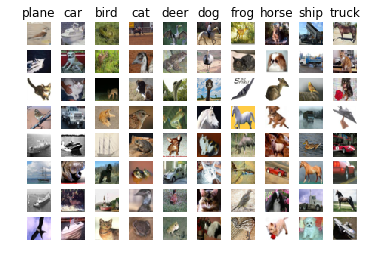

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
**Answer** The images misclassified as planes have large proportions of sky or blue'ish segments. Since it is quite likely that correct images of class 'plane' also have this background, it could be a reason why it has been mis-classified.
The shape of some objects classified as car or truck could fit this category, although its correct label is not of this class.
Also, deers and horses have quite the same shape.


## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
print(X_train_feats.shape)

(49000, 245)


In [14]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

best_net = None
best_val = -1.0
results = {}
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
verbose_mode = False
num_classes = 10
learning_rates = np.logspace(-2,0,3) #(-8,0,4)
regularization_strengths = np.logspace(-3,5,5) #(-3,1,5)
for lr in learning_rates:
  for rs in regularization_strengths:
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)
    
    # Train the network
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=rs, verbose=verbose_mode)
    
    #Get last elment in list of val accs
    validation_accuracy = stats['val_acc_history'][-1]
    training_accuracy = stats['train_acc_history'][-1]
    results[(lr, rs)] = (training_accuracy, validation_accuracy)
    if validation_accuracy > best_val:
      best_val = validation_accuracy
      best_net = net
    if verbose_mode==True:
        print('Done. Lr: %.2e | Reg: %.2e | Val_acc: %.3f '% (
                lr, rs, validation_accuracy))
    
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %.2e reg %.2e train accuracy: %.3f val accuracy: %.3f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %.3f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

/Users/oliver/sync/doc/cs231n/cs231n-solutions/assignment1/cs231n/classifiers/neural_net.py:110: RuntimeWarning: invalid value encountered in true_divide
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
/Users/oliver/sync/doc/cs231n/cs231n-solutions/assignment1/cs231n/classifiers/neural_net.py:116: RuntimeWarning: divide by zero encountered in log
  correct_probs = -np.log(correct_probs)
/Users/oliver/sync/doc/cs231n/cs231n-solutions/assignment1/cs231n/classifiers/neural_net.py:79: RuntimeWarning: invalid value encountered in maximum
  a1 = np.maximum(0.0,z1)
/Users/oliver/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/oliver/sync/doc/cs231n/cs231n-solutions/assignment1/cs231n/classifiers/neural_net.py:149: RuntimeWarning: invalid value encountered in less_equal
  dhidden[a1 <= 0] = 0
/Users/oliver/sync/doc/cs231n/cs231n-solutions/assignment1/cs

lr 1.00e-02 reg 1.00e-03 train accuracy: 0.165 val accuracy: 0.217
lr 1.00e-02 reg 1.00e-01 train accuracy: 0.180 val accuracy: 0.158
lr 1.00e-02 reg 1.00e+01 train accuracy: 0.095 val accuracy: 0.102
lr 1.00e-02 reg 1.00e+03 train accuracy: 0.095 val accuracy: 0.087
lr 1.00e-02 reg 1.00e+05 train accuracy: 0.090 val accuracy: 0.087
lr 1.00e-01 reg 1.00e-03 train accuracy: 0.585 val accuracy: 0.558
lr 1.00e-01 reg 1.00e-01 train accuracy: 0.430 val accuracy: 0.464
lr 1.00e-01 reg 1.00e+01 train accuracy: 0.085 val accuracy: 0.079
lr 1.00e-01 reg 1.00e+03 train accuracy: 0.085 val accuracy: 0.087
lr 1.00e-01 reg 1.00e+05 train accuracy: 0.125 val accuracy: 0.087
lr 1.00e+00 reg 1.00e-03 train accuracy: 0.960 val accuracy: 0.547
lr 1.00e+00 reg 1.00e-01 train accuracy: 0.520 val accuracy: 0.379
lr 1.00e+00 reg 1.00e+01 train accuracy: 0.135 val accuracy: 0.087
lr 1.00e+00 reg 1.00e+03 train accuracy: 0.075 val accuracy: 0.087
lr 1.00e+00 reg 1.00e+05 train accuracy: 0.080 val accuracy: 0

In [16]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.
net = best_net
test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.54


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!